Saving Girl.pgm to Girl.pgm


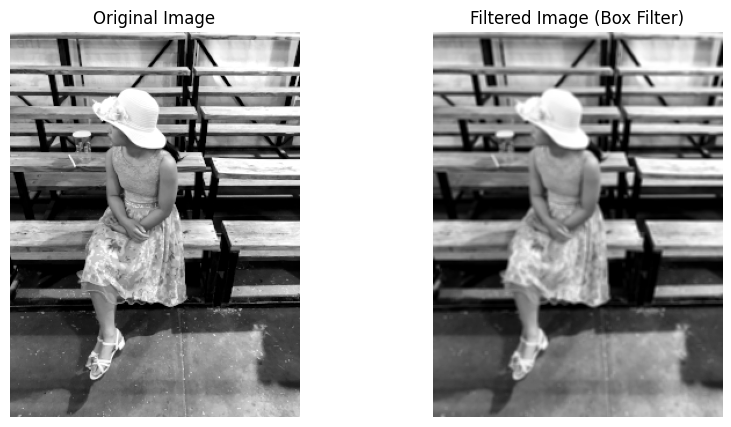

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Upload an image file
uploaded = files.upload()

# Assuming there's only one image uploaded, get the name of the file
image_filename = next(iter(uploaded))

# Read the image into a numpy array using matplotlib
image = plt.imread(image_filename)

# If the image is not in uint8, it must be converted
if image.dtype != np.uint8:
    image = (image * 255).astype(np.uint8)

# If the image has an alpha channel, discard it as we are only working with RGB or grayscale
if image.ndim == 3 and image.shape[2] == 4:
    image = image[:, :, :3]

# If the image is grayscale, its shape would be 2D, otherwise 3D for color images
is_gray = image.ndim == 2

height, width = image.shape[:2]

# Image Filtering (Box Filter)
kernel_size = 3  # Size of the filter kernel
pad = kernel_size // 2

# Pad the image depending on whether it is grayscale or color
if is_gray:
    padded_image = np.pad(image, [(pad, pad), (pad, pad)], mode='reflect')
else:  # Color image
    padded_image = np.pad(image, [(pad, pad), (pad, pad), (0, 0)], mode='reflect')

# Apply box filter to each channel
filtered_image = np.zeros_like(image)
for y in range(height):
    for x in range(width):
        for c in range(image.shape[2] if not is_gray else 1):  # Loop through color channels
            # Slice and calculate the mean, assuming the kernel is square
            kernel_area = padded_image[y:y+kernel_size, x:x+kernel_size] if is_gray else padded_image[y:y+kernel_size, x:x+kernel_size, c]
            filtered_image[y, x] = np.mean(kernel_area) if is_gray else filtered_image[y, x, c]

# Ensure correct data type for display
filtered_image = filtered_image.astype(np.uint8)

# Display the results
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray' if is_gray else None)
plt.title('Original Image')
plt.axis('off')

# Display filtered image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray' if is_gray else None)
plt.title('Filtered Image (Box Filter)')
plt.axis('off')

plt.show()
